In [28]:


#imports
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import os
import json
from pandas import json_normalize

def load_df(csv_path='../input/train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df


In [29]:
train = load_df(nrows=100000, csv_path="data/train.csv")
test = load_df("data/test.csv", 100000)

Loaded train.csv. Shape: (100000, 55)
Loaded test.csv. Shape: (100000, 53)


In [30]:
test.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,...,trafficSource.keyword,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.referralPath,trafficSource.adContent
0,Organic Search,20171016,6167871330617112363,6167871330617112363_1508151024,Not Socially Engaged,1508151024,2,1508151024,Chrome,not available in demo dataset,...,(not provided),True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20171016,0643697640977915618,0643697640977915618_1508175522,Not Socially Engaged,1508175522,1,1508175522,Chrome,not available in demo dataset,...,(not provided),NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20171016,6059383810968229466,6059383810968229466_1508143220,Not Socially Engaged,1508143220,1,1508143220,Chrome,not available in demo dataset,...,(not provided),NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20171016,2376720078563423631,2376720078563423631_1508193530,Not Socially Engaged,1508193530,1,1508193530,Safari,not available in demo dataset,...,(not provided),NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,20171016,2314544520795440038,2314544520795440038_1508217442,Not Socially Engaged,1508217442,1,1508217442,Safari,not available in demo dataset,...,(not provided),NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,...,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.isTrueDirect,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,trafficSource.campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
test.describe()

,date,visitId,visitNumber,visitStartTime
count,1.000000e+05,1.000000e+05,100000.000000,1.000000e+05
mean,2.017577e+07,1.513966e+09,2.410840,1.513966e+09
std,4.617857e+03,6.302320e+06,9.729287,6.302320e+06
min,2.017082e+07,1.503125e+09,1.000000,1.503126e+09
25%,2.017102e+07,1.508184e+09,1.000000,1.508184e+09
50%,2.018010e+07,1.515013e+09,1.000000,1.515013e+09
75%,2.018023e+07,1.519838e+09,1.000000,1.519838e+09
max,2.018043e+07,1.525072e+09,456.000000,1.525072e+09


In [33]:
train.describe()

,date,visitId,visitNumber,visitStartTime
count,1.000000e+05,1.000000e+05,100000.000000,1.000000e+05
mean,2.016536e+07,1.484710e+09,2.274210,1.484710e+09
std,4.694358e+03,9.166865e+06,9.260941,9.166865e+06
min,2.016081e+07,1.470896e+09,1.000000,1.470899e+09
25%,2.016111e+07,1.478832e+09,1.000000,1.478832e+09
50%,2.016121e+07,1.481667e+09,1.000000,1.481667e+09
75%,2.017050e+07,1.493684e+09,1.000000,1.493684e+09
max,2.017080e+07,1.501657e+09,389.000000,1.501657e+09


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 55 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   channelGrouping                                    100000 non-null  object
 1   date                                               100000 non-null  int64 
 2   fullVisitorId                                      100000 non-null  object
 3   sessionId                                          100000 non-null  object
 4   socialEngagementType                               100000 non-null  object
 5   visitId                                            100000 non-null  int64 
 6   visitNumber                                        100000 non-null  int64 
 7   visitStartTime                                     100000 non-null  int64 
 8   device.browser                                     100000 non-null  object
 9   devic

We can tell that there appears to be no missing values

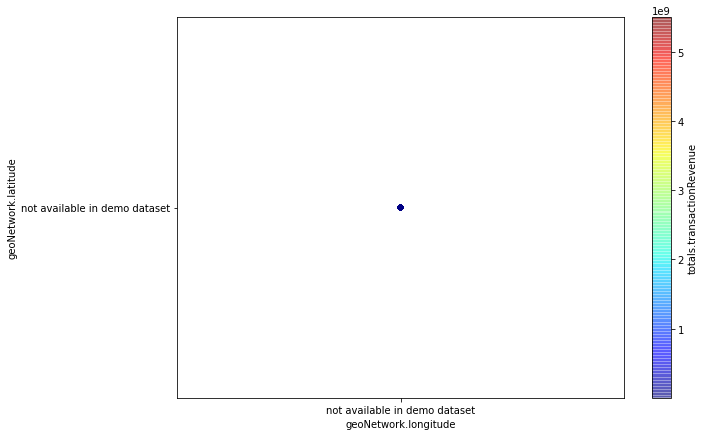

In [37]:
train.plot(kind="scatter", x="geoNetwork.longitude", y="geoNetwork.latitude", alpha=0.4,
    #s=training["totals.transactionRevenut"]/100, label="transactionRevenue", 
    figsize=(10,7),
    c="totals.transactionRevenue", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)



In [39]:
train["geoNetwork.longitude"]

0        not available in demo dataset
1        not available in demo dataset
2        not available in demo dataset
3        not available in demo dataset
4        not available in demo dataset
                     ...              
99995    not available in demo dataset
99996    not available in demo dataset
99997    not available in demo dataset
99998    not available in demo dataset
99999    not available in demo dataset
Name: geoNetwork.longitude, Length: 100000, dtype: object

In [54]:
#df = df.loc[:, (df.isnull().sum(axis=0) <= max_number_of_nas)]
#train = train.loc[:, (train.eq("not available in demo dataset"))]

# Find the columns where values are not available
useless_cols = [col for col in train.columns if train[col].eq("not available in demo dataset").all()]
# Drop these columns from the dataframe
train.drop(useless_cols,
        axis=1,
        inplace=True)
train.info()

# Find the columns where values are not available
useless_cols = [col for col in train.columns if train[col].isna().all()]
# Drop these columns from the dataframe
train.drop(useless_cols,
        axis=1,
        inplace=True)
train.info()

C:\Users\steff\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 38 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   channelGrouping                               100000 non-null  object
 1   date                                          100000 non-null  int64 
 2   fullVisitorId                                 100000 non-null  object
 3   sessionId                                     100000 non-null  object
 4   socialEngagementType                          100000 non-null  object
 5   visitId                                       100000 non-null  int64 
 6   visitNumber                                   100000 non-null  int64 
 7   visitStartTime                                100000 non-null  int64 
 8   device.browser                                100000 non-null  object
 9   device.operatingSystem                        100000 non-nul

In [55]:
train["totals.transactionRevenue"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
99995    NaN
99996    NaN
99997    NaN
99998    NaN
99999    NaN
Name: totals.transactionRevenue, Length: 100000, dtype: object

Maybe add columns for lat/long using another dataset like https://simplemaps.com/data/world-cities

In [57]:
payingCustomers = train.loc[train['totals.transactionRevenue'].notna()]
payingCustomers

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,...,trafficSource.keyword,trafficSource.isTrueDirect,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,trafficSource.campaignCode
752,Direct,20160902,6194193421514403509,6194193421514403509_1472843572,Not Socially Engaged,1472843572,1,1472843572,Chrome,Linux,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
753,Organic Search,20160902,5327166854580374902,5327166854580374902_1472844906,Not Socially Engaged,1472844906,3,1472844906,Chrome,Macintosh,...,(not provided),True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
799,Referral,20160902,8885051388942907862,8885051388942907862_1472827393,Not Socially Engaged,1472827393,7,1472827393,Chrome,Linux,...,NaN,True,/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
802,Referral,20160902,0185467632009737931,0185467632009737931_1472846398,Not Socially Engaged,1472846398,6,1472846398,Chrome,Windows,...,NaN,True,/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
859,Referral,20160902,3244885836845029978,3244885836845029978_1472824817,Not Socially Engaged,1472824817,4,1472824817,Chrome,Macintosh,...,NaN,True,/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99729,Referral,20161030,3590222967147519334,3590222967147519334_1477882251,Not Socially Engaged,1477882251,3,1477882251,Chrome,Macintosh,...,NaN,True,/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99730,Referral,20161030,6781934558737955524,6781934558737955524_1477852085,Not Socially Engaged,1477852085,3,1477852085,Chrome,Macintosh,...,NaN,True,/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99733,Referral,20161030,5976063913493194585,5976063913493194585_1477847924,Not Socially Engaged,1477847924,3,1477847924,Chrome,Macintosh,...,NaN,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99736,Referral,20161030,1710276641442998015,1710276641442998015_1477873893,Not Socially Engaged,1477873893,2,1477873893,Chrome,Macintosh,...,NaN,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
payingCustomers.describe()

,date,visitId,visitNumber,visitStartTime
count,1.399000e+03,1.399000e+03,1399.000000,1.399000e+03
mean,2.016555e+07,1.485392e+09,3.887777,1.485392e+09
std,4.715261e+03,9.379675e+06,10.389323,9.379678e+06
min,2.016081e+07,1.470908e+09,1.000000,1.470908e+09
25%,2.016112e+07,1.479507e+09,1.000000,1.479507e+09
50%,2.016122e+07,1.481930e+09,2.000000,1.481930e+09
75%,2.017052e+07,1.494876e+09,4.000000,1.494876e+09
max,2.017080e+07,1.501652e+09,315.000000,1.501652e+09


In [59]:
payingCustomers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 752 to 99743
Data columns (total 38 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   channelGrouping                               1399 non-null   object
 1   date                                          1399 non-null   int64 
 2   fullVisitorId                                 1399 non-null   object
 3   sessionId                                     1399 non-null   object
 4   socialEngagementType                          1399 non-null   object
 5   visitId                                       1399 non-null   int64 
 6   visitNumber                                   1399 non-null   int64 
 7   visitStartTime                                1399 non-null   int64 
 8   device.browser                                1399 non-null   object
 9   device.operatingSystem                        1399 non-null   object
 1

In [61]:
payingCustomers["channelGrouping"].value_counts()

Referral          667
Organic Search    394
Direct            244
Paid Search        62
Display            20
Social             12
Name: channelGrouping, dtype: int64

In [67]:
payingCustomers["date"].value_counts()

20161216    87
20170501    78
20161213    77
20161209    72
20160816    59
20161130    57
20160822    57
20170613    48
20161129    46
20160811    45
20170801    43
20170420    39
20170519    39
20170515    37
20170616    36
20161118    35
20170621    34
20170630    33
20160831    32
20161123    31
20170203    29
20170228    29
20170113    28
20170126    27
20160902    27
20170623    26
20170611    26
20161110    25
20170303    25
20161014    21
20160820    21
20170529    18
20170617    18
20170318    17
20170111    17
20161030    16
20161112    15
20170312    11
20170624    10
20160917     8
Name: date, dtype: int64

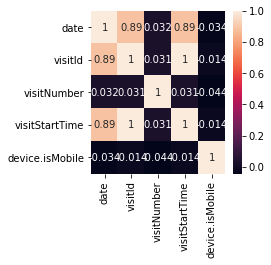

In [71]:
import seaborn as sns
cor = payingCustomers.corr()
plt.figure(figsize=(3,3))
sns.heatmap(cor, annot=True)

In [73]:
corr_matrix = payingCustomers.corr()
corr_matrix['totals.transactionRevenue'].sort_values(ascending=False)

KeyError: 'totals.transactionRevenue'